(326, 731, 3)


(np.float64(-0.5), np.float64(730.5), np.float64(325.5), np.float64(-0.5))

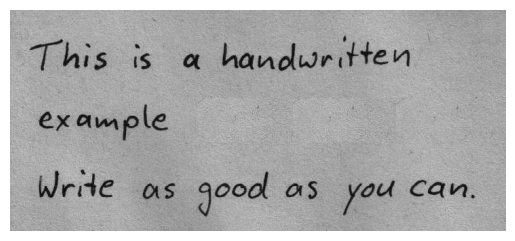

In [26]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

img=cv2.imread("/content/IMG_5152.PNG")
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2192.5), np.float64(977.5), np.float64(-0.5))

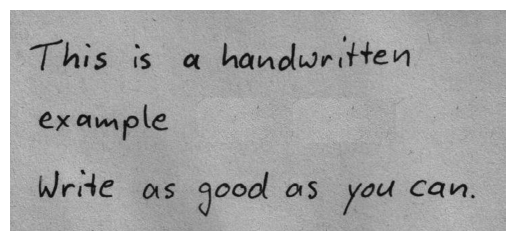

In [27]:
rescaled = cv2.resize(img,None,fx=3.0,fy=3.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(rescaled)
plt.axis("off")

(np.float64(-0.5), np.float64(2192.5), np.float64(977.5), np.float64(-0.5))

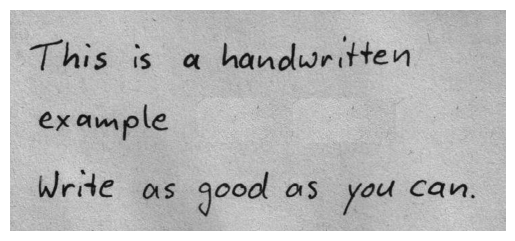

In [28]:
grayscale = cv2.cvtColor(rescaled,cv2.COLOR_RGB2GRAY)
plt.imshow(grayscale,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2192.5), np.float64(977.5), np.float64(-0.5))

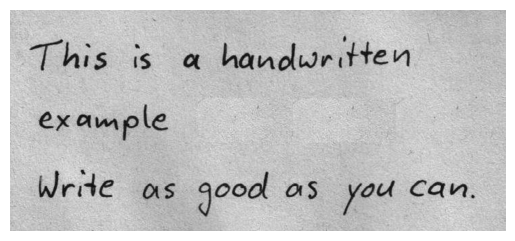

In [29]:
denoised = cv2.GaussianBlur(grayscale, (3, 3), 0)
plt.imshow(denoised,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2192.5), np.float64(977.5), np.float64(-0.5))

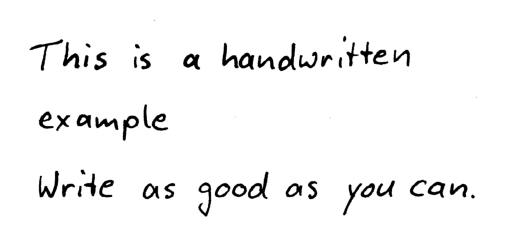

In [30]:
_, binary = cv2.threshold(
    denoised, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
plt.imshow(binary,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2192.5), np.float64(977.5), np.float64(-0.5))

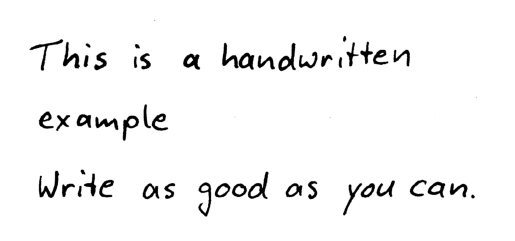

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
opening = cv2.morphologyEx(
    binary, cv2.MORPH_OPEN, kernel
)
plt.imshow(opening,cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(2252.5), np.float64(1037.5), np.float64(-0.5))

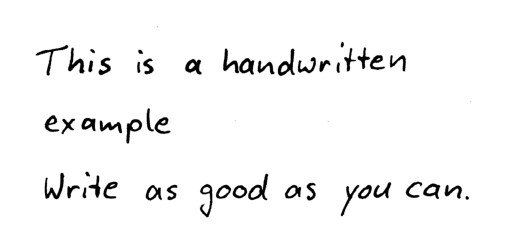

In [32]:
pad = 30

padded = cv2.copyMakeBorder(
    opening,
    pad, pad, pad, pad,
    cv2.BORDER_CONSTANT,
    value=255
)

plt.imshow(padded, cmap="gray")
plt.axis("off")


In [33]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [34]:
import pytesseract
text = pytesseract.image_to_string(img,config=r'--psm 6')
print(text)

This is a handluritten
example
Write as qooal as you can.



In [35]:
!pip install jiwer


In [36]:
import jiwer

reference = "this is a handwritten example write as good as you can."

wer = jiwer.wer(reference, text)

cer = jiwer.cer(reference, text)

print(f"WER: {wer:.2f}")
print(f"CER: {cer:.2f}")

WER: 0.45
CER: 0.16
